#**Sobre o conjunto de dados** <p>


"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


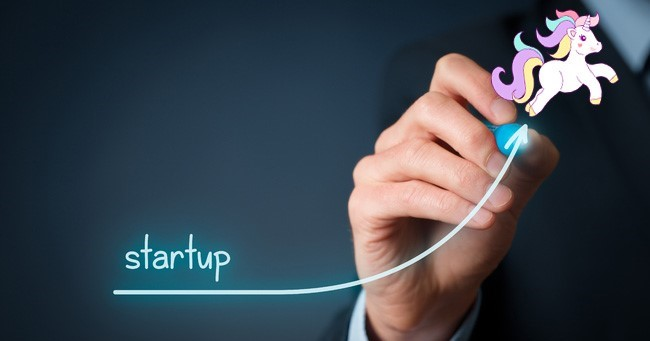

#**Importando os dados e pré-análise**

In [43]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Ler os dados
df = pd.read_csv('Startups+in+2021+end.csv')

# Verificar Dimensão
df.shape

(936, 8)

In [45]:
# Primeiros registros
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


**Renomeando as Features**

In [46]:
# Renomear
df.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'empresa',
    'Valuation ($B)' : 'valor ($)',
    'Date Joined' : 'data de Adesão',
    'Country' : 'pais',
    'City' : 'cidade',
    'Industry': 'setor',
    'Select Investors': 'investidores',
}, inplace=True )

In [47]:
df.head()

,Id,empresa,valor ($),data de Adesão,pais,cidade,setor,investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [48]:
df.drop(columns="Id", inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   empresa         936 non-null    object
 1   valor ($)       936 non-null    object
 2   data de Adesão  936 non-null    object
 3   pais            936 non-null    object
 4   cidade          921 non-null    object
 5   setor           936 non-null    object
 6   investidores    935 non-null    object
dtypes: object(7)
memory usage: 51.3+ KB


In [50]:
df.isnull().sum()

empresa            0
valor ($)          0
data de Adesão     0
pais               0
cidade            15
setor              0
investidores       1
dtype: int64

In [51]:
df.nunique()

empresa           935
valor ($)         192
data de Adesão    589
pais               47
cidade            239
setor              17
investidores      920
dtype: int64

In [52]:
# Valores Unicos
df['setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [53]:
# Valores Unicos - Rank
df['setor'].value_counts( normalize=True )

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: setor, dtype: float64

**Transformando a coluna "valor" em númérica e retirando o $**

In [54]:

df['valor ($)'] = pd.to_numeric(df['valor ($)'].apply( lambda Linha: Linha.replace('$', '')))

**Convertendo a coluna das datas para datatime**

In [55]:
# Conversão para Data
df['data de Adesão'] = pd.to_datetime(df['data de Adesão'] )

df['data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: data de Adesão, dtype: datetime64[ns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   empresa         936 non-null    object        
 1   valor ($)       936 non-null    float64       
 2   data de Adesão  936 non-null    datetime64[ns]
 3   pais            936 non-null    object        
 4   cidade          921 non-null    object        
 5   setor           936 non-null    object        
 6   investidores    935 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 51.3+ KB


**Decompondo a coluna de Data em mais duas colunas, mês e ano.**

In [57]:
# Extrair o Ano e Mes
df['mes'] = pd.DatetimeIndex(df['data de Adesão']).month
df['ano'] = pd.DatetimeIndex(df['data de Adesão']).year

df.head()

,empresa,valor ($),data de Adesão,pais,cidade,setor,investidores,mes,ano
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


# **Analisando estatísticamente o Target**

### **Correlação:**

**Vemos abaixo nos dois gráficos que há correlações positivas altas e baixas entre as Features e o Target, mas não há correlação negativa de acordo com a correlação de Pearson.**

In [58]:
df.corr()

,valor ($),mes,ano
valor ($),1.000000,-0.023278,-0.230509
mes,-0.023278,1.000000,-0.072174
ano,-0.230509,-0.072174,1.000000


**Correlação de Pearson:**

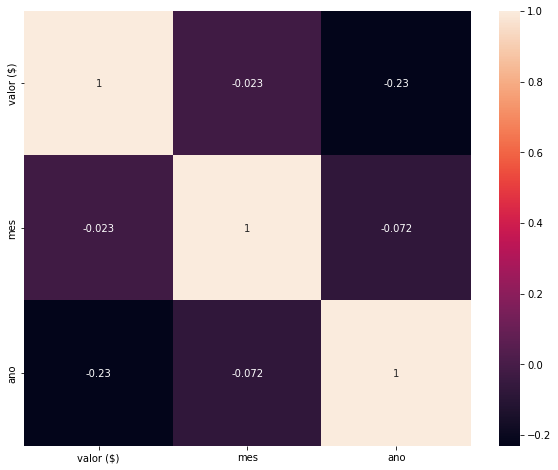

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

**Correlação de Spearman:**

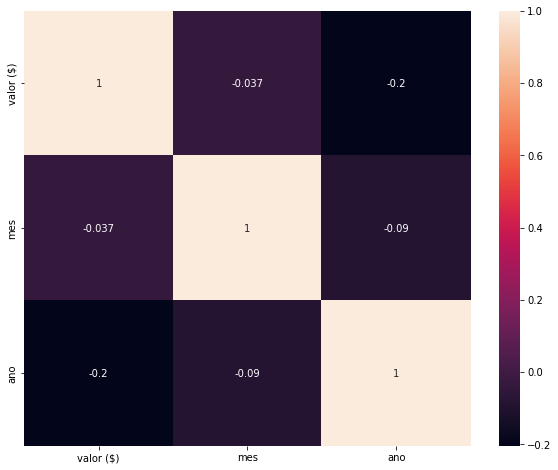

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True)

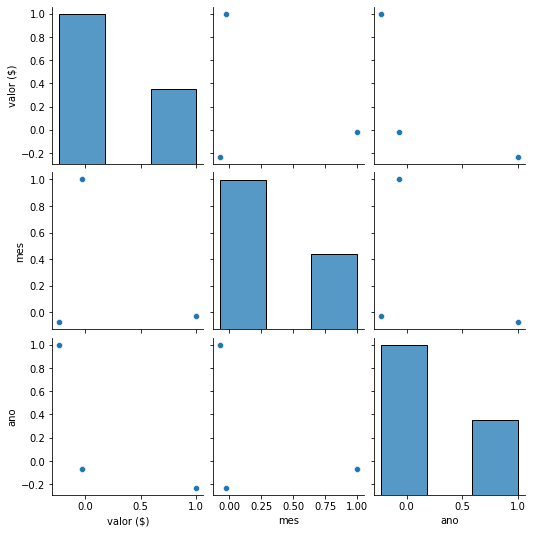

In [62]:
sns.pairplot(df.corr());

###**Intervalo de confiança - Média dos valores de mercado**

**Nível de confiança = 95%**

Iremos pegar 50 amostras aleatórias:

In [84]:
import random
lista = []
for num in df["valor ($)"]:
  lista.append(num)
dados = random.sample(lista,50)

Média amostral:

In [85]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

2.9341999999999997

Desvio padrão amostral:

In [86]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

4.266838474963468

Número de amostras:

In [87]:
n = len(dados)
n

50

In [88]:
from scipy.stats import norm
from scipy import stats
import math

In [89]:
stats.sem(dados)

0.603422083974867

In [93]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(1.7515144479331564, 4.116885552066843)

In [91]:
margem_erro = media - intervalos[0]
margem_erro

1.5543122863110077

**Temos 95% de confiança que a média geral dos valores de mercado estará entre 1.75 Bilhões e  4.11 Bilhões com uma margem de erro de $ 1.55 Bi para mais e para menos**

**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [92]:
df["valor ($)"].mean()

3.281153846153846

### **Percebe-se abaixo que os valores dos outliers são extremamente desproporcionais:**

In [ ]:
df_target = df["total (R$)"]
df_target = pd.DataFrame(df_target)
df_target

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df_target);

### **Avaliando os quartis:**

In [97]:
Q1 = df["valor ($)"].quantile(q=0.25) # Primeiro quartil
Q2 = df["valor ($)"].quantile(q=0.50) # Segundo quartil
Q3 = df["valor ($)"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df["valor ($)"].mean()
mediana = df["valor ($)"].median()
moda = df["valor ($)"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf:.2f}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 1.05
Segundo quartil: 1.6
Terceiro quartil: 3.0
Intervalo interquartílico: 1.95
Limite superior: 5.925
Limite inferior: -1.87
Média geral: 3.28
Mediana: 1.60
Moda-Valor mais frequente: 1.00


**Retirando alguns Outliers para melhor visualização do gráfico:**

In [129]:
df_out = pd.DataFrame()
df_out = df[df["valor ($)"] < 4]

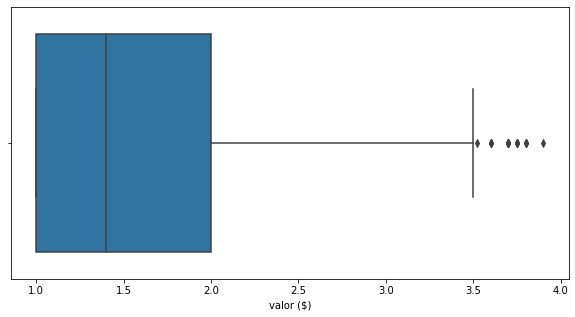

In [130]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_out, x="valor ($)");

### **Assimetria positiva =>  moda <= mediana <= média**

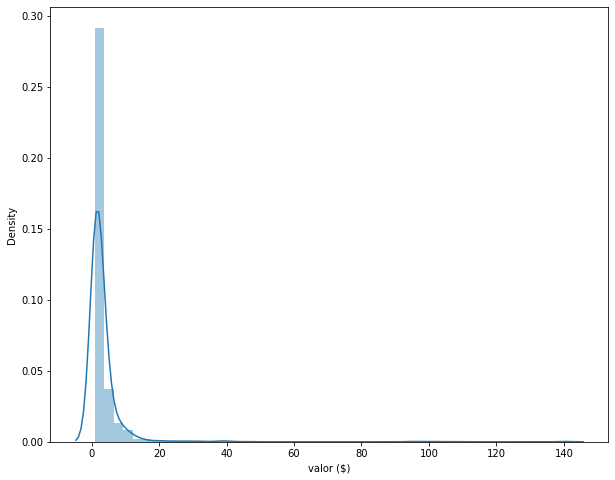

In [132]:
plt.figure(figsize=(10,8))
sns.distplot(df["valor ($)"]);

### **Avaliando a medida de curtose:**

**Para valores abaixo de 0.263 => Mesmo com os grandes quantidades e valores dos outliers o resultado identificou como Leptocúrtica, mostrando que a maioria dos seus dados se dá em torno do seu centro:**

In [134]:
Q10 = df["valor ($)"].quantile(q=0.1) # Décimo quartil
Q90 = df["valor ($)"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.195

#**Quantidade de setores de empresas Unicórnios existentes**

In [ ]:
empresas_uni = len(df["setor"].value_counts())
print(f"Existem {empresas_uni} setores de empresas Unicórnio.")

Existem 17 setores de empresas Unicórnio.


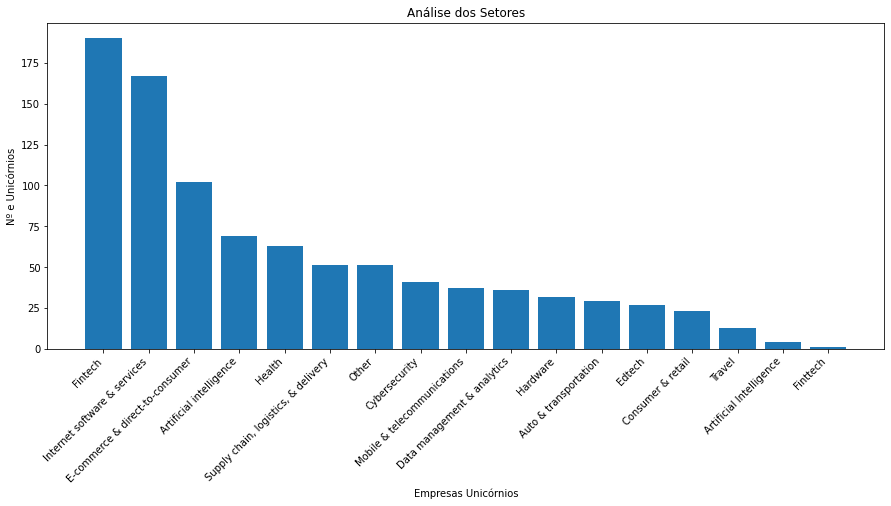

In [ ]:
plt.figure( figsize=(15,6) )
plt.title('Análise dos Setores')
plt.xlabel("Empresas Unicórnios")
plt.ylabel("Nº e Unicórnios")
plt.bar(df['setor'].value_counts().index, df['setor'].value_counts())
plt.xticks( rotation=45, ha='right' );

# **Os 10 primeiros países que mais produzem Unicórnios**

In [ ]:
analise_paises = df["pais"].value_counts()
analise_paises = pd.DataFrame(analise_paises)
analise_paises_10_primeiros = analise_paises["pais"][:10]
analise_paises_10_primeiros

United States     477
China             169
India              51
United Kingdom     37
Germany            23
Israel             21
France             19
Canada             15
Brazil             15
South Korea        11
Name: pais, dtype: int64

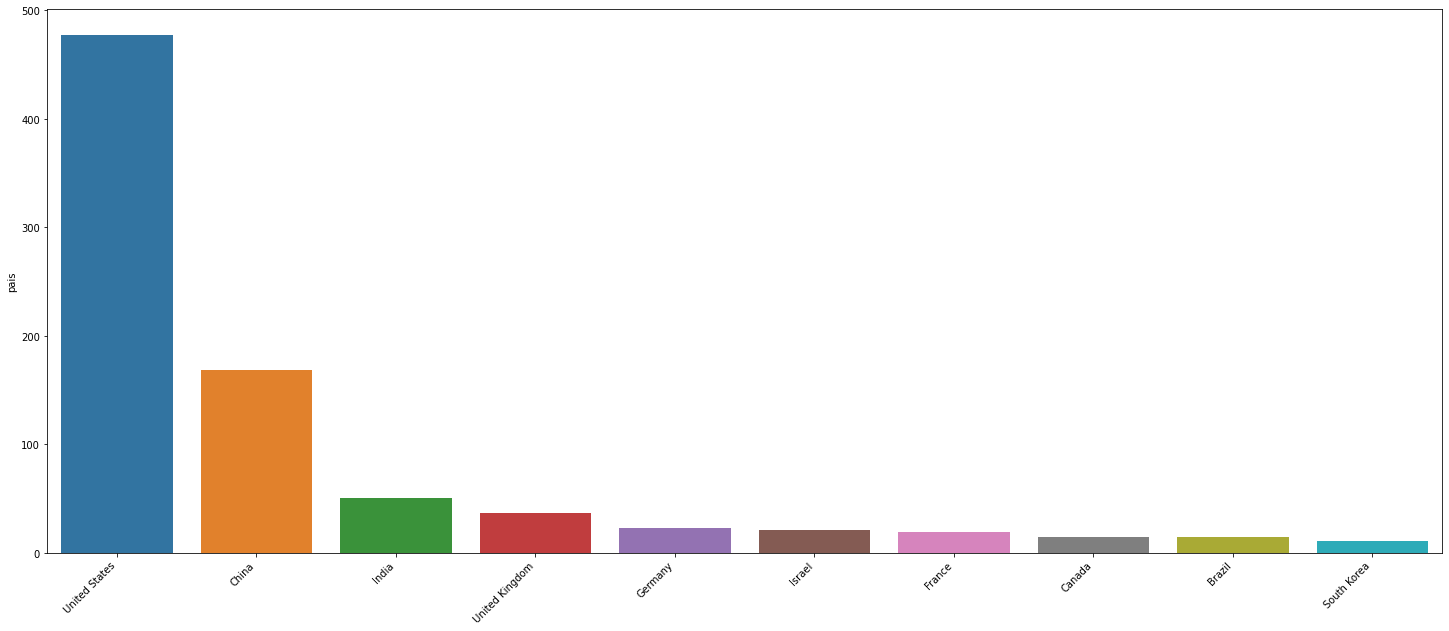

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(y=analise_paises_10_primeiros, x=analise_paises.index[:10])
plt.xticks( rotation=45, ha='right' );

# **Quantas empresas Unicórnios o Brasil criou no decorrer dos anos?Quais foram as empresas?**

In [ ]:
qtde = df[df["pais"]=="Brazil"]
print(f"Foram criadas {len(qtde)} empresas")

Foram criadas 15 empresas


In [ ]:
analise_agrupada = df.groupby(by=['pais', "mes", "empresa"])["ano"].value_counts().sort_index()
analise_agrupada = pd.DataFrame(analise_agrupada)
analise_agrupada = analise_agrupada.rename(columns={"ano":"qtde"})
analise_agrupada = analise_agrupada.reset_index()
analise_agrupada_brasil = analise_agrupada[analise_agrupada["pais"]== "Brazil"]
analise_agrupada_brasil.sort_values(by="ano")

,pais,mes,empresa,ano,qtde
14,Brazil,3,Nubank,2018,1
16,Brazil,7,Movile,2018,1
23,Brazil,11,iFood,2018,1
15,Brazil,6,Loggi,2019,1
20,Brazil,9,QuintoAndar,2019,1
22,Brazil,10,EBANX,2019,1
26,Brazil,12,Wildlife Studios,2019,1
12,Brazil,1,Loft,2020,1
24,Brazil,12,C6 Bank,2020,1
25,Brazil,12,Creditas,2020,1


In [ ]:
empresas_brasil = analise_agrupada_brasil["empresa"]
empresas_brasil.tolist()

['Loft',
 'MadeiraMadeira',
 'Nubank',
 'Loggi',
 'Movile',
 'Nuvemshop',
 'Unico',
 '1',
 'QuintoAndar',
 'CargoX',
 'EBANX',
 'iFood',
 'C6 Bank',
 'Creditas',
 'Wildlife Studios']

# **Vimos que o setor de Fintech foram os que mais chegaram ao nível de Unicórnio, qual foi o primeiro? E qual tem o maior valor atualmente?**

**Primeira Unicórnio brasileira e o ano:**

In [ ]:
unicornios = df[df["setor"] == "Fintech"]
unicornios = unicornios[["setor", "empresa", "valor ($)", "ano", ]]
unicornios = unicornios.sort_values(by="ano")[["empresa","ano"]]
unicornios[:1]

,empresa,ano
3,Klarna,2011


**Empresa com maior valor de mercado:**

In [ ]:
#Valor em Bilhões
unicornios = df[df["setor"] == "Fintech"]
unicornios = unicornios[["setor", "empresa", "valor ($)", "ano", ]]
unicornios = unicornios.sort_values(by="valor ($)", ascending=False)[["empresa","valor ($)"]]
unicornios[:1]

,empresa,valor ($)
2,Stripe,95.0


# **Ranking dos países onde tem os maiores valores de Startups do mercado. Qual a posição do Brasil?**

In [ ]:
df

In [ ]:
df_group = df.groupby(by=["pais"]).sum().reset_index()
df_group

,pais,valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45




*   **Nota-se o valor discrepante entre os EUA e os outros países do mundo.**
*  **O Brasil, apesar de estar em 9º no ranking dos países que mais criaram Startups (Vimos no terceiro tópico), ocupa o 6º em valor de mercado.**



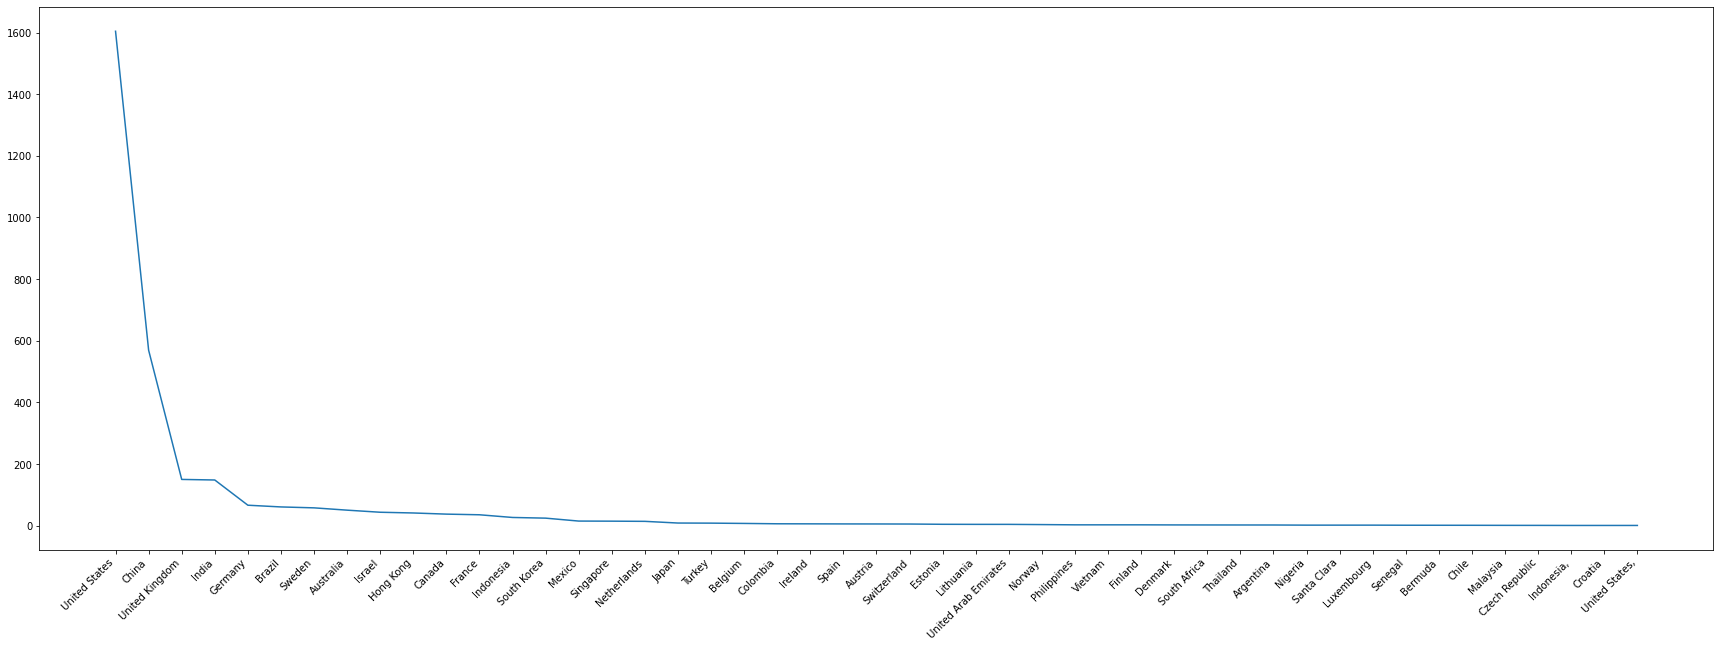

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(df_group["pais"], df_group["valor ($)"])
plt.xticks(rotation=45, ha="right");

# **Qual o ano que nasceu as empresas Unicórnios em relação aos maiores valores do mercado?**

In [ ]:
valor_mercado = df.groupby(by="valor ($)")["ano"].value_counts()
valor_mercado = valor_mercado.sort_values()
valor_mercado

valor ($)  ano 
2.77       2018      1
4.50       2018      1
           2016      1
           2015      1
4.45       2016      1
                  ... 
1.00       2018     24
1.50       2021     29
1.20       2021     31
2.00       2021     36
1.00       2021    137
Name: ano, Length: 372, dtype: int64

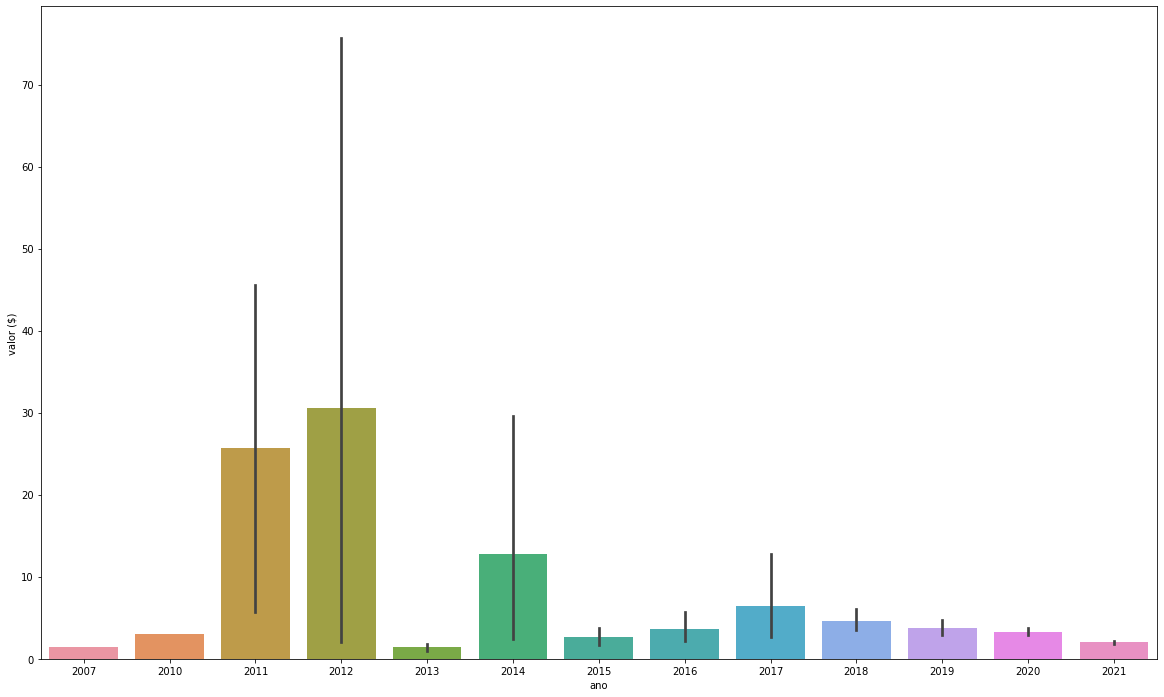

In [ ]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df, y="valor ($)", x="ano");